## Problem Statement:
    To model the knn classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign 
    tumor or malignant tumor.

In [4]:
'''Attribute Information: (class attribute has been moved to last column)
   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)'''

'Attribute Information: (class attribute has been moved to last column)\n   #  Attribute                     Domain\n   -- -----------------------------------------\n   1. Sample code number            id number\n   2. Clump Thickness               1 - 10\n   3. Uniformity of Cell Size       1 - 10\n   4. Uniformity of Cell Shape      1 - 10\n   5. Marginal Adhesion             1 - 10\n   6. Single Epithelial Cell Size   1 - 10\n   7. Bare Nuclei                   1 - 10\n   8. Bland Chromatin               1 - 10\n   9. Normal Nucleoli               1 - 10\n  10. Mitoses                       1 - 10\n  11. Class:                        (2 for benign, 4 for malignant)'

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv("breast-cancer-wisconsin.data.csv", names=col, header=None)
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Preprocessing

In [39]:
df.isnull().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [40]:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [41]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [42]:
df[df['Bare Nuclei'] == "?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


Dropping the the rows with special character

In [43]:
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

In [44]:
#Checking the Target Variable
df.Class.unique()

array([2, 4], dtype=int64)

In [45]:
# converting the target as 0 and 1

df['Class']=df['Class']/2-1

In [46]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


In [47]:
#Splitting X and Y

X = df.drop(['id', 'Class'], axis=1)
X_col = X.columns
y=df['Class']

***How to improve KNN?***

For better results, ***normalizing data on the same scale is highly recommended***. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

In [52]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id', 'Class'], axis=1).values), columns=X_col).head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


# Training - Modelling 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df1 = pd.DataFrame(X, columns=X_col)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

### Parameter tuning for  K 

In [69]:
accuracy=[]
Kval=[]
for K in range(25):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred)*100)
    Kval.append(K)
#     print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

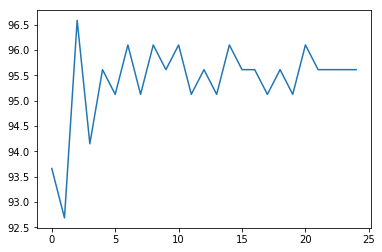

In [74]:
sns.lineplot(Kval,accuracy)

In [100]:
knn = KNeighborsClassifier(n_neighbors=3,
                           p=2, metric='minkowski')

In [101]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [102]:
pred_y=knn.predict(X_test)

In [103]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import *

In [105]:
print(classification_report(pred_y,y_test))
print('---------------------------------')
print('accuracy :',accuracy_score(pred_y,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       130
         1.0       0.94      0.97      0.95        75

   micro avg       0.97      0.97      0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

---------------------------------
accuracy : 0.9658536585365853


# Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [94]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  # Tuning with single parameter

In [85]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [86]:
grid_search_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [87]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [88]:
knn1=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [89]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [90]:
y_pred=knn1.predict(X_test)

In [106]:
print(classification_report(pred_y,y_test))
print('---------------------------------')

print('accuracy :',accuracy_score(pred_y,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       130
         1.0       0.94      0.97      0.95        75

   micro avg       0.97      0.97      0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

---------------------------------
accuracy : 0.9658536585365853
